In [33]:
# learning to write pythonic code

import csv
import numpy as np
import re
import math

schoolName=[]; medIncome=[]; SAT_total=[];
with open("highschool2015_2.csv",'rU') as csvfile:
    csvReader = csv.reader(csvfile)
    next(csvReader) # skip header
    for row in csvReader:
        
        
        # if medIncome or SAT score is not a number
        # skip this record
        medIncome_i = re.sub('[$,"\s]','',row[2])
        SAT_total_i = row[3].split("/")[0]
        try:       
            SAT_total.append(float(SAT_total_i))
            medIncome.append(float(medIncome_i))
            schoolName.append(row[0])

        except: TypeError

N=len(medIncome)

In [20]:
# prepare data for linear regression

# scaling with mean normalization 
# (probably not required, but good practice)
x1_mu = sum(medIncome)/float(N)
x1_range = np.amax(medIncome) - np.amin(medIncome)
x1_norm = []
x1_norm [:] = [ ( x - x1_mu ) / float (x1_range) for x in medIncome]

y_mu = sum(SAT_total)/float(N)
y_range = np.amax(SAT_total) - np.amin(SAT_total)
y_norm = []
y_norm [:] = [ ( y - y_mu ) / float (y_range) for y in SAT_total]


# univariate linear regression, with x0=1
X_train = zip( np.ones(N),x1_norm)

In [21]:
from sklearn import linear_model as lm

# Create linear regression object
regr = lm.LinearRegression()
regr.fit(X_train, y_norm)

# convert y back to abs value
y_predicted_norm = regr.predict(X_train)
y_predicted = []
y_predicted [:] = [ y*y_range+y_mu for y in y_predicted_norm ]


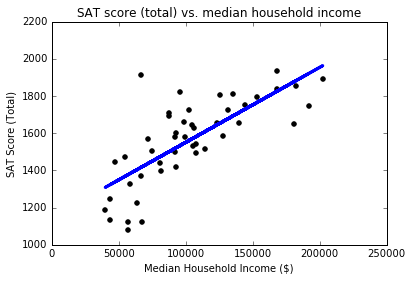

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(medIncome,SAT_total, color='black')

plt.plot(medIncome, y_predicted, color='blue', linewidth=3)

plt.title("SAT score (total) vs. median household income")


plt.xlabel("Median Household Income ($)")
plt.ylabel("SAT Score (Total)")


plt.show()

In [59]:
# print out the schools, sorted by % difference between actual and predicted

pctDiff = []
pctDiff[:] = ( (SAT_total[i]-y_predicted[i])/y_predicted[i]*100 for i,_ in enumerate(schoolName))
finalData = zip(schoolName,SAT_total,y_predicted,pctDiff)
finalData_sorted = sorted(finalData, key = lambda x : x[3],reverse=True)
for school,score,predictedScore,pctDiff in finalData_sorted:
    print "%-40s %6.1f %6.1f %6.2f" %(school,score,predictedScore,pctDiff)

Blind Brook (Rye Brook)                  1911.0 1416.0  34.96
Bronxville                               1821.0 1533.6  18.74
Mamaroneck                               1706.0 1499.4  13.78
Rye Neck (Mamaroneck)                    1692.0 1499.4  12.85
Croton-Harmon                            1724.0 1561.8  10.39
Hastings                                 1808.0 1655.1   9.24
Lakeland (Shrub Oak)                     1569.0 1436.4   9.23
Yonkers-High                             1447.0 1338.3   8.12
New Rochelle                             1472.0 1367.1   7.67
Somers                                   1658.0 1544.3   7.36
Ardsley                                  1812.0 1692.1   7.09
Scarsdale                                1935.0 1826.8   5.92
Hendrick Hudson (Montrose)               1601.0 1522.3   5.17
Dobbs Ferry                              1645.0 1570.6   4.74
Eastchester                              1581.0 1518.6   4.11
Ossining                                 1506.0 1449.3   3.91
Yorktown